#📌 Extracción

#### Extraccion de Datos

In [208]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [209]:
pd.read_json('/content/sample_data/TelecomX_Data.json')

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


In [210]:
# Lo guardamos en df
df = pd.read_json('/content/sample_data/TelecomX_Data.json')

#🔧 Transformación

In [211]:
# Verifiquemos que columnas tiene actualmente nuestro data frame. Aunque
# ya podemos visualizar que hay estructuras anidadas por columna

print("📌 Columnas actuales en el DataFrame:")
print(df.columns.tolist())


📌 Columnas actuales en el DataFrame:
['customerID', 'Churn', 'customer', 'phone', 'internet', 'account']


In [212]:
# Aqui aplanaremos las estructuras anidadas

# Expandir columna 'customer'
customer_df = pd.json_normalize(df["customer"])
phone_df = pd.json_normalize(df["phone"])
internet_df = pd.json_normalize(df["internet"])
account_df = pd.json_normalize(df["account"])

# Concatenar todo en un solo DataFrame
df = pd.concat([df[["customerID", "Churn"]],
                     customer_df, phone_df, internet_df, account_df], axis=1)

df.head()


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


#### Conocer nuestros datos

In [213]:
print("📌 Columnas actuales en el DataFrame:")
print(df.columns.tolist())

📌 Columnas actuales en el DataFrame:
['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly', 'Charges.Total']


In [214]:
# Tamaño de la base de datos
print("Número de filas y columnas:", df.shape)
print("Número de filas:", df.shape[0])
print("Número de columnas:", df.shape[1])


Número de filas y columnas: (7267, 21)
Número de filas: 7267
Número de columnas: 21


In [215]:
# Explorar columnas y tipos de datos
print("📌 Información general del dataset:")
df.info()

📌 Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contrac

In [216]:
print("\n📌 Tipos de datos por columna:")
df.dtypes


📌 Tipos de datos por columna:


,0
customerID,object
Churn,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object


#### Diccionario de datos

- `customerID`: número de identificación único de cada cliente
- `Churn`: si el cliente dejó o no la empresa
- `gender`: género (masculino y femenino)
- `SeniorCitizen`: información sobre si un cliente tiene o no una edad igual o mayor a 65 años
- `Partner`: si el cliente tiene o no una pareja
- `Dependents`: si el cliente tiene o no dependientes
- `tenure`: meses de contrato del cliente
- `PhoneService`: suscripción al servicio telefónico
- `MultipleLines`: suscripción a más de una línea telefónica
- `InternetService`: suscripción a un proveedor de internet
- `OnlineSecurity`: suscripción adicional de seguridad en línea
- `OnlineBackup`: suscripción adicional de respaldo en línea
- `DeviceProtection`: suscripción adicional de protección del dispositivo
- `TechSupport`: suscripción adicional de soporte técnico, menor tiempo de espera
- `StreamingTV`: suscripción de televisión por cable
- `StreamingMovies`: suscripción de streaming de películas
- `Contract`: tipo de contrato
- `PaperlessBilling`: si el cliente prefiere recibir la factura en línea
- `PaymentMethod`: forma de pago
- `Charges.Monthly`: total de todos los servicios del cliente por mes
- `Charges.Total`: total gastado por el cliente

In [217]:
# Ver las 5 primeras filas para reconocer las variables
print("\n📌 Primeras filas del dataset:")
df.head()


📌 Primeras filas del dataset:


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


#### Comprobar incoherencias en los datos

Verificamos si hay problemas en los datos que puedan afectar el análisis.

In [218]:
# Verificamos valores ausentes
print("❌ Valores nulos por columna:")
df.isnull().sum()


❌ Valores nulos por columna:


,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


In [219]:
# valores duplicados

print("\n📌 Filas duplicadas:", df.duplicated().sum())


📌 Filas duplicadas: 0


In [220]:
# ver los valores unicos en cada columna
for col in df.columns:
    print(f"\n🔎 Columna: {col}")
    print(pd.unique(df[col]))



🔎 Columna: customerID
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']

🔎 Columna: Churn
['No' 'Yes' '']

🔎 Columna: gender
['Female' 'Male']

🔎 Columna: SeniorCitizen
[0 1]

🔎 Columna: Partner
['Yes' 'No']

🔎 Columna: Dependents
['Yes' 'No']

🔎 Columna: tenure
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]

🔎 Columna: PhoneService
['Yes' 'No']

🔎 Columna: MultipleLines
['No' 'Yes' 'No phone service']

🔎 Columna: InternetService
['DSL' 'Fiber optic' 'No']

🔎 Columna: OnlineSecurity
['No' 'Yes' 'No internet service']

🔎 Columna: OnlineBackup
['Yes' 'No' 'No internet service']

🔎 Columna: DeviceProtection
['No' 'Yes' 'No internet service']

🔎 Columna: TechSupport
['Yes' 'No' 'No internet service']

🔎 Columna: StreamingTV
['Yes' 'No' 'No internet service']

🔎 Columna: StreamingM

In [221]:
print("\n🔎 Valores únicos por columna:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} valores únicos")


🔎 Valores únicos por columna:
customerID: 7267 valores únicos
Churn: 3 valores únicos
gender: 2 valores únicos
SeniorCitizen: 2 valores únicos
Partner: 2 valores únicos
Dependents: 2 valores únicos
tenure: 73 valores únicos
PhoneService: 2 valores únicos
MultipleLines: 3 valores únicos
InternetService: 3 valores únicos
OnlineSecurity: 3 valores únicos
OnlineBackup: 3 valores únicos
DeviceProtection: 3 valores únicos
TechSupport: 3 valores únicos
StreamingTV: 3 valores únicos
StreamingMovies: 3 valores únicos
Contract: 3 valores únicos
PaperlessBilling: 2 valores únicos
PaymentMethod: 4 valores únicos
Charges.Monthly: 1585 valores únicos
Charges.Total: 6531 valores únicos


In [222]:
print("\n📌 Distribución de la variable Churn:")

# aqui vemos  que hay un valor de vacio " " en churn
print(df["Churn"].value_counts())


📌 Distribución de la variable Churn:
Churn
No     5174
Yes    1869
        224
Name: count, dtype: int64


In [223]:
# aqui transformamos en las variables, si es que hubiera " "(espacio en blanco) a valores nulos nan
df["Churn"] = df["Churn"].replace(r'^\s*$', np.nan, regex=True)
df["OnlineBackup"] = df["OnlineBackup"].replace(r'^\s*$', np.nan, regex=True)
df["tenure"] = df["tenure"].replace(r'^\s*$', np.nan, regex=True)
df["MultipleLines"] = df["MultipleLines"].replace(r'^\s*$', np.nan, regex=True)
df["InternetService"] = df["InternetService"].replace(r'^\s*$', np.nan, regex=True)
df["DeviceProtection"] = df["DeviceProtection"].replace(r'^\s*$', np.nan, regex=True)
df["StreamingTV"] = df["StreamingTV"].replace(r'^\s*$', np.nan, regex=True)
df["StreamingMovies"] = df["StreamingMovies"].replace(r'^\s*$', np.nan, regex=True)
df["Contract"] = df["Contract"].replace(r'^\s*$', np.nan, regex=True)
df["PaymentMethod"] = df["PaymentMethod"].replace(r'^\s*$', np.nan, regex=True)
df["Charges.Monthly"] = df["Charges.Monthly"].replace(r'^\s*$', np.nan, regex=True)
df["Charges.Total"] = df["Charges.Total"].replace(r'^\s*$', np.nan, regex=True)





In [224]:
# Ademas, Convertimos a numérico (float) a charges.total
df["Charges.Total"] = pd.to_numeric(df["Charges.Total"], errors="coerce")

In [225]:
df.isnull().sum()

,0
customerID,0
Churn,224
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


#### Manejo de Inconsistencias

In [226]:
print("❌ Nulos en Churn:", df["Churn"].isnull().sum())
print("❌ Nulos en TotalCharges:", df["Charges.Total"].isnull().sum())


❌ Nulos en Churn: 224
❌ Nulos en TotalCharges: 11


In [227]:
df = df.dropna(subset=["Churn"])
df = df.dropna(subset=["Charges.Total"])


In [228]:
print("❌ Nulos en Churn:", df["Churn"].isnull().sum())
print("❌ Nulos en TotalCharges:", df["Charges.Total"].isnull().sum())

❌ Nulos en Churn: 0
❌ Nulos en TotalCharges: 0


In [229]:
print("Número de filas:", df.shape[0])
print("Número de columnas:", df.shape[1])

Número de filas: 7032
Número de columnas: 21


In [230]:
df

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.90
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [231]:
#Convertimos
cols_categoricas = ["gender", "Partner", "Dependents", "PhoneService", "Churn"]

for col in cols_categoricas:
    df[col] = df[col].astype("category")


In [232]:
df["Partner"] = df["Partner"].map({"Yes": 1, "No": 0})
df["Dependents"] = df["Dependents"].map({"Yes": 1, "No": 0})
df["PhoneService"] = df["PhoneService"].map({"Yes": 1, "No": 0})
df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})


In [233]:
df["gender"] = df["gender"].map({"Male": "Hombre", "Female": "Mujer"})
df["gender"] = df["gender"].astype("category")


In [234]:
df.info()
print("\n\n")
print(df.nunique())  # cuántos valores únicos por columna


<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7032 non-null   object  
 1   Churn             7032 non-null   category
 2   gender            7032 non-null   category
 3   SeniorCitizen     7032 non-null   int64   
 4   Partner           7032 non-null   category
 5   Dependents        7032 non-null   category
 6   tenure            7032 non-null   int64   
 7   PhoneService      7032 non-null   category
 8   MultipleLines     7032 non-null   object  
 9   InternetService   7032 non-null   object  
 10  OnlineSecurity    7032 non-null   object  
 11  OnlineBackup      7032 non-null   object  
 12  DeviceProtection  7032 non-null   object  
 13  TechSupport       7032 non-null   object  
 14  StreamingTV       7032 non-null   object  
 15  StreamingMovies   7032 non-null   object  
 16  Contract          7032 non-nu

#### Creacion de columna Cuentas_diarias

In [235]:
# Usamos 30 días como aproximado
df["Cuentas_Diarias"] = df["Charges.Monthly"] / 30


In [236]:
df[["Charges.Monthly", "Cuentas_Diarias"]].head()

,Charges.Monthly,Cuentas_Diarias
0,65.6,2.186667
1,59.9,1.996667
2,73.9,2.463333
3,98.0,3.266667
4,83.9,2.796667


In [237]:
df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,0,Mujer,0,1,1,9,1,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,0,Hombre,0,0,0,9,1,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,1,Hombre,0,0,0,4,1,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,1,Hombre,1,1,0,13,1,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,1,Mujer,1,1,0,3,1,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


#### Estandarizacion y transformacion de datos

In [238]:
# Columnas a renombrar
columnas_traduccion = {
    "customerID": "ID_cliente",
    "gender": "Genero",
    "SeniorCitizen": "Adulto_Mayor_de_65",
    "Partner": "Tiene_Pareja",
    "Dependents": "Tiene_dependientes",
    "tenure": "Meses_de_Contrato",
    "PhoneService": "ServicioTelefonico",
    "MultipleLines": "MultiplesLineas",
    "InternetService": "ServicioInternet",
    "OnlineSecurity": "SeguridadEnLinea",
    "OnlineBackup":"RespaldoEnLinea" ,
    "DeviceProtection":"ProteccionDispositivo",
    "TechSupport":"SoporteTecnico",
    "StreamingTV":"TelevisionXcable",
    "StreamingMovies":"StreamingPeliculas",
    "Contract": "TipoContrato",
    "PaperlessBilling": "FacturacionSinPapel",
    "PaymentMethod": "MetodoPago",
    "Charges.Monthly": "CargosMensuales",
    "Charges.Total": "CargosTotales",
    "Churn": "Evasion"  # target
}

# Renombrar columnas
df = df.rename(columns=columnas_traduccion)

print("✅ Columnas traducidas:")
print(df.columns.tolist())

✅ Columnas traducidas:
['ID_cliente', 'Evasion', 'Genero', 'Adulto_Mayor_de_65', 'Tiene_Pareja', 'Tiene_dependientes', 'Meses_de_Contrato', 'ServicioTelefonico', 'MultiplesLineas', 'ServicioInternet', 'SeguridadEnLinea', 'RespaldoEnLinea', 'ProteccionDispositivo', 'SoporteTecnico', 'TelevisionXcable', 'StreamingPeliculas', 'TipoContrato', 'FacturacionSinPapel', 'MetodoPago', 'CargosMensuales', 'CargosTotales', 'Cuentas_Diarias']


#📊 Carga y análisis

#### Analisis Descriptivo

In [239]:
print("\n📊 Resumen de variables categóricas:")
df.describe(include="object")



📊 Resumen de variables categóricas:


,ID_cliente,MultiplesLineas,ServicioInternet,SeguridadEnLinea,RespaldoEnLinea,ProteccionDispositivo,SoporteTecnico,TelevisionXcable,StreamingPeliculas,TipoContrato,FacturacionSinPapel,MetodoPago
count,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032
unique,7032,3,3,3,3,3,3,3,3,3,2,4
top,9995-HOTOH,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
freq,1,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365


In [240]:
# Estadísticos generales (solo numéricos por defecto)
print("\n📊 Resumen estadístico de variables numéricas:")
df.describe()


📊 Resumen estadístico de variables numéricas:


,Adulto_Mayor_de_65,Meses_de_Contrato,CargosMensuales,CargosTotales,Cuentas_Diarias
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441,2.159940
std,0.368844,24.545260,30.085974,2266.771362,1.002866
min,0.000000,1.000000,18.250000,18.800000,0.608333
25%,0.000000,9.000000,35.587500,401.450000,1.186250
50%,0.000000,29.000000,70.350000,1397.475000,2.345000
75%,0.000000,55.000000,89.862500,3794.737500,2.995417
max,1.000000,72.000000,118.750000,8684.800000,3.958333


#### Distribucion de la evasion

In [241]:
# variable Evasion
df["Evasion"].value_counts()

,count
Evasion,
0,5163
1,1869


In [242]:
df["Evasion"].value_counts(normalize=True).round(4) * 100  # porcentajes

,proportion
Evasion,
0,73.42
1,26.58


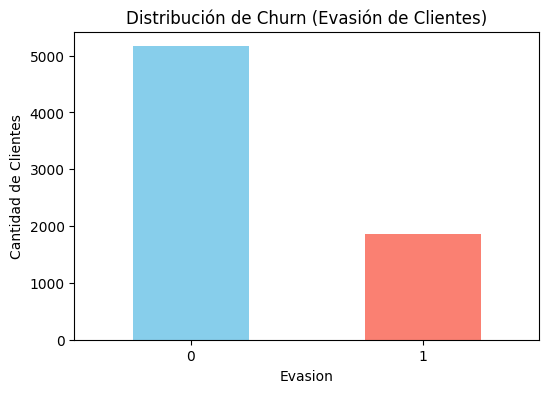

In [243]:

churn_counts = df["Evasion"].value_counts()

plt.figure(figsize=(6,4))
churn_counts.plot(kind="bar", color=["skyblue", "salmon"])
plt.title("Distribución de Churn (Evasión de Clientes)")
plt.xlabel("Evasion")
plt.ylabel("Cantidad de Clientes")
plt.xticks(rotation=0)
plt.show()


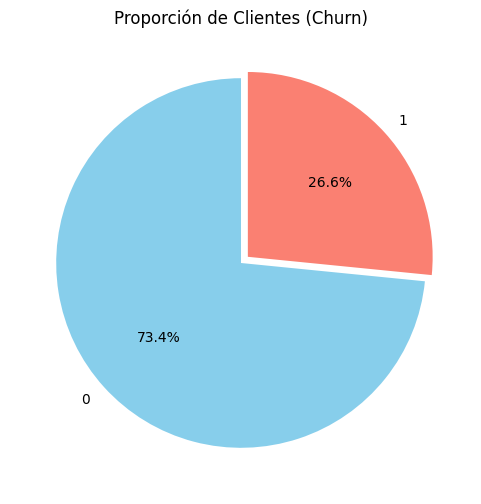

In [244]:
plt.figure(figsize=(6,6))
df["Evasion"].value_counts().plot(
    kind="pie",
    autopct="%1.1f%%",
    startangle=90,
    colors=["skyblue", "salmon"],
    explode=(0,0.05)  # resalta la categoría "Yes"
)
plt.title("Proporción de Clientes (Churn)")
plt.ylabel("")  # quita el label extra
plt.show()


#### Recuento de evasion por variables categoricas

In [245]:

# Ejem. con variable Género
tabla_genero = pd.crosstab(df["Genero"], df["Evasion"], normalize="index") * 100
tabla_genero




Evasion,0,1
Genero,,
Mujer,73.040482,26.959518
Hombre,73.795435,26.204565


In [246]:
# Ejem. con variable Tipo de Contrato
tabla_contrato = pd.crosstab(df["TipoContrato"], df["Evasion"], normalize="index") * 100
tabla_contrato


Evasion,0,1
TipoContrato,,
Month-to-month,57.290323,42.709677
One year,88.722826,11.277174
Two year,97.151335,2.848665


In [247]:
# Ejem. con variable Método de Pago
tabla_pago = pd.crosstab(df["MetodoPago"], df["Evasion"], normalize="index") * 100
tabla_pago

Evasion,0,1
MetodoPago,,
Bank transfer (automatic),83.268482,16.731518
Credit card (automatic),84.746877,15.253123
Electronic check,54.714588,45.285412
Mailed check,80.798005,19.201995


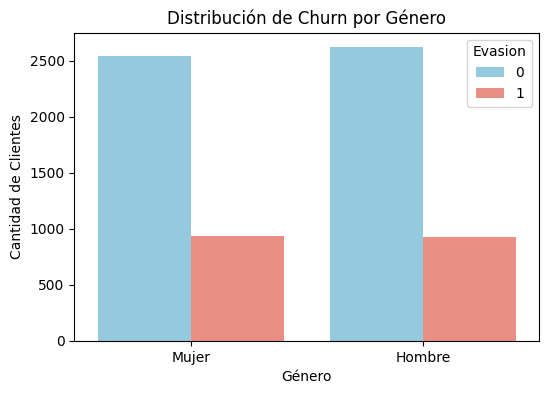

In [248]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Genero", hue="Evasion", palette=["skyblue","salmon"])
plt.title("Distribución de Churn por Género")
plt.xlabel("Género")
plt.ylabel("Cantidad de Clientes")
plt.show()


La evasión de clientes es similar en hombres y mujeres, por lo que el género no representa un factor decisivo en la cancelación del servicio( evasion por parte del cliente)

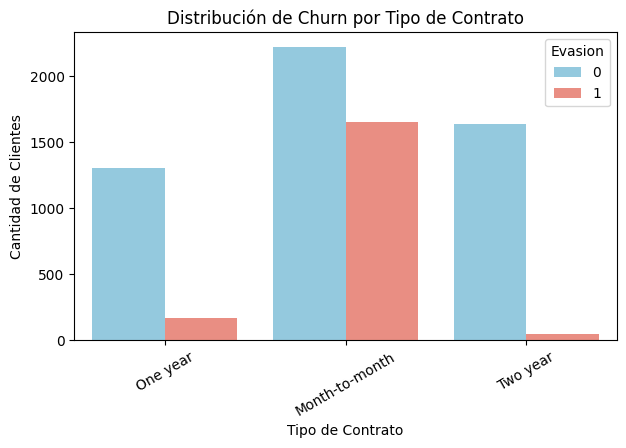

In [249]:
plt.figure(figsize=(7,4))
sns.countplot(data=df, x="TipoContrato", hue="Evasion", palette=["skyblue","salmon"])
plt.title("Distribución de Churn por Tipo de Contrato")
plt.xlabel("Tipo de Contrato")
plt.ylabel("Cantidad de Clientes")
plt.xticks(rotation=30)
plt.show()


- Month-to-month (mes a mes)

Es el tipo de contrato con más clientes que cancelan (Churn=1).

La barra roja (evasión) es bastante alta, casi cercana a la azul (clientes que permanecen).

Esto indica que los contratos mensuales son más inestables, porque los clientes tienen libertad de irse en cualquier momento y muchos lo hacen.

- One year (1 año)

La mayoría de clientes con este contrato permanecen (azul).

Solo una pequeña proporción cancela (rojo).

Esto sugiere que el compromiso de un año reduce la evasión, pero no la elimina por completo.

- Two year (2 años)

Aquí la evasión (rojo) es mínima.

La mayoría de clientes se queda (azul).

Esto indica que mientras más largo sea el contrato, menor es la probabilidad de cancelación.

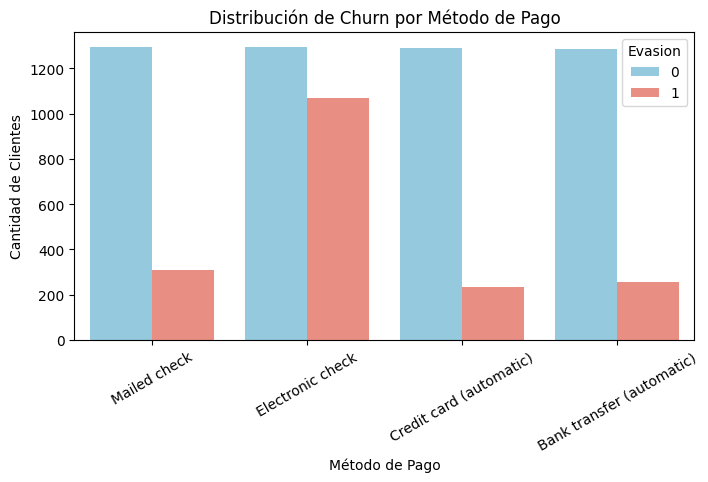

In [250]:
plt.figure(figsize=(8,4))
sns.countplot(data=df, x="MetodoPago", hue="Evasion", palette=["skyblue","salmon"])
plt.title("Distribución de Churn por Método de Pago")
plt.xlabel("Método de Pago")
plt.ylabel("Cantidad de Clientes")
plt.xticks(rotation=30)
plt.show()


El método de pago influye en la evasión de clientes. Los clientes que utilizan Electronic Check presentan un mayor nivel de cancelación, mientras que aquellos con pagos automáticos (tarjeta de crédito o transferencia bancaria) muestran una mayor fidelidad.

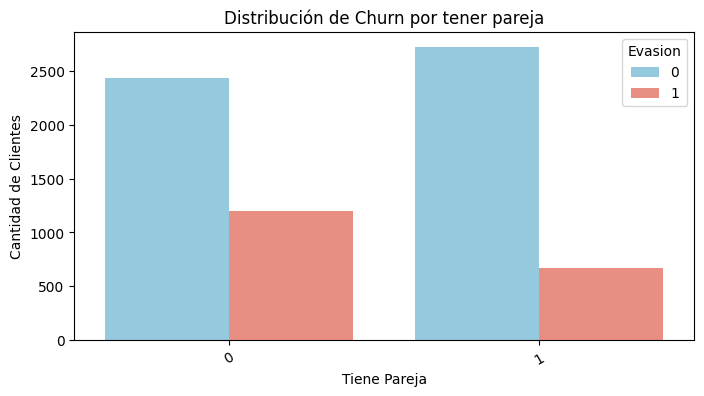

In [251]:
plt.figure(figsize=(8,4))
sns.countplot(data=df, x="Tiene_Pareja", hue="Evasion", palette=["skyblue","salmon"])
plt.title("Distribución de Churn por tener pareja")
plt.xlabel("Tiene Pareja")
plt.ylabel("Cantidad de Clientes")
plt.xticks(rotation=30)
plt.show()


- Grupo "0" (No tiene pareja): Hay aproximadamente 2400 clientes que no evadieron y alrededor de 1200 que sí lo hicieron. Esto significa que, en este grupo, el número de clientes que se van es la mitad de los que se quedan, lo que indica una tasa de evasión relativamente alta.

- Grupo "1" (Sí tiene pareja): Hay más de 2500 clientes que no evadieron y alrededor de 700 que sí lo hicieron. La diferencia entre los que se quedan y los que se van es mucho más pronunciada que en el grupo anterior. La tasa de evasión es significativamente menor.

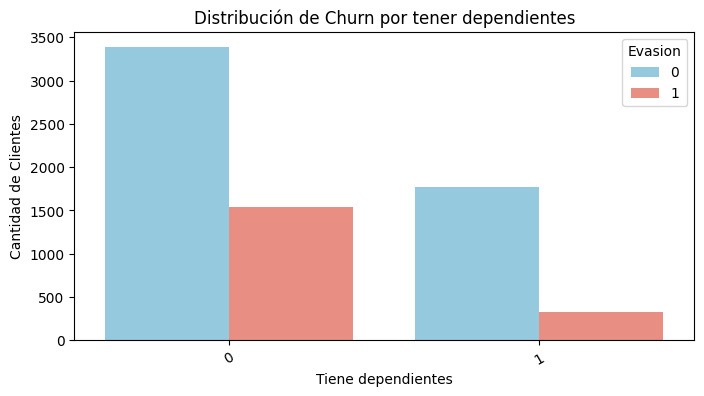

In [252]:
plt.figure(figsize=(8,4))
sns.countplot(data=df, x="Tiene_dependientes", hue="Evasion", palette=["skyblue","salmon"])
plt.title("Distribución de Churn por tener dependientes")
plt.xlabel("Tiene dependientes")
plt.ylabel("Cantidad de Clientes")
plt.xticks(rotation=30)
plt.show()


Este gráfico de barras compara la evasión (churn) entre clientes que tienen dependientes y los que no.

- Grupo "0" (No tiene dependientes):

Hay una gran cantidad de clientes que no evadieron (barra azul alta, aproximadamente 3400).

Sin embargo, también hay un número considerable de clientes que sí evadieron (barra roja alta, aproximadamente 1500).

- Grupo "1" (Sí tiene dependientes):

El número de clientes que no evadieron es significativamente menor que en el otro grupo (barra azul de aproximadamente 1800).

Lo más importante, el número de clientes que sí evadieron es muy bajo (barra roja baja, aproximadamente 300).

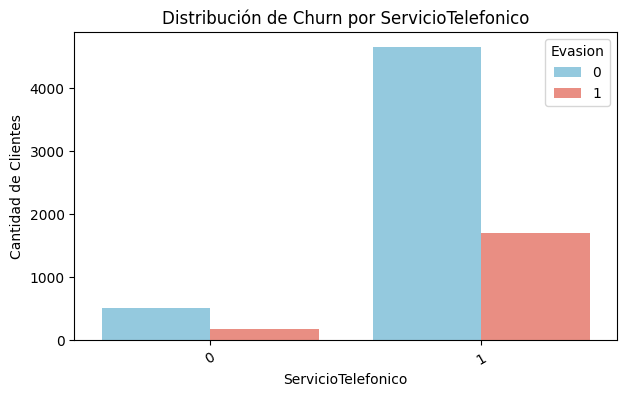

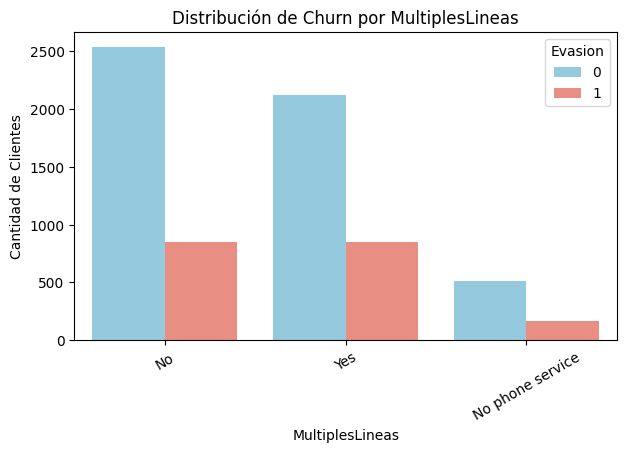

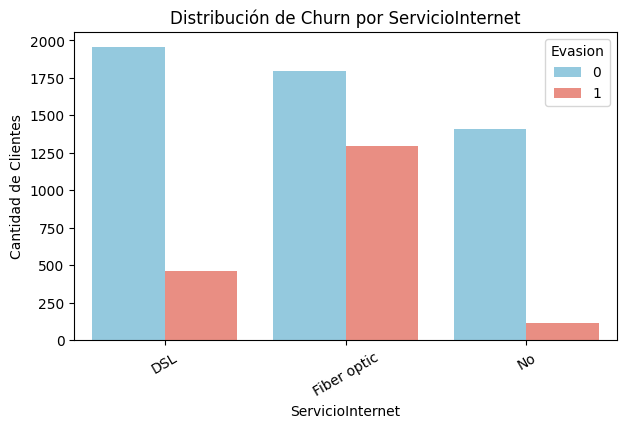

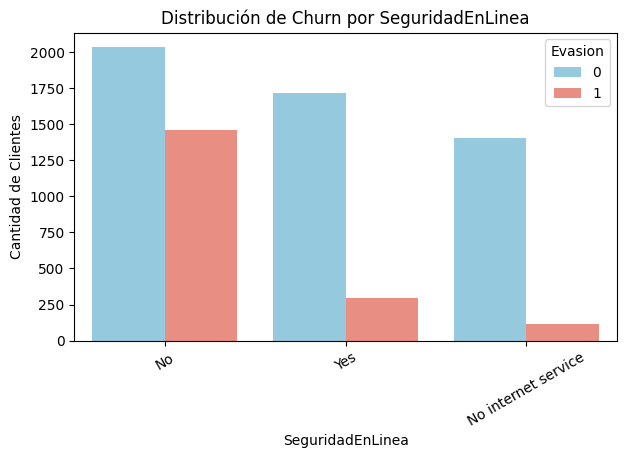

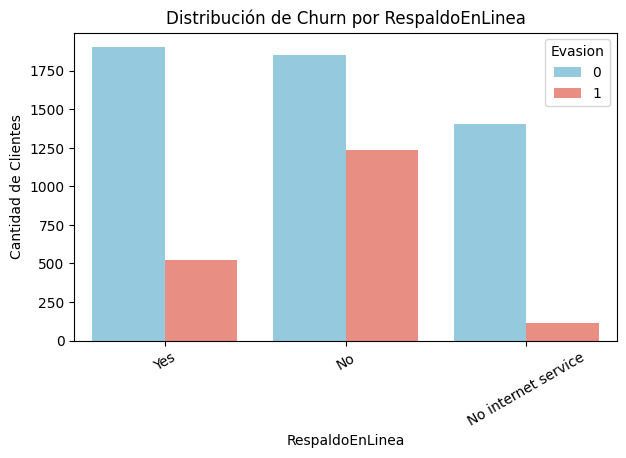

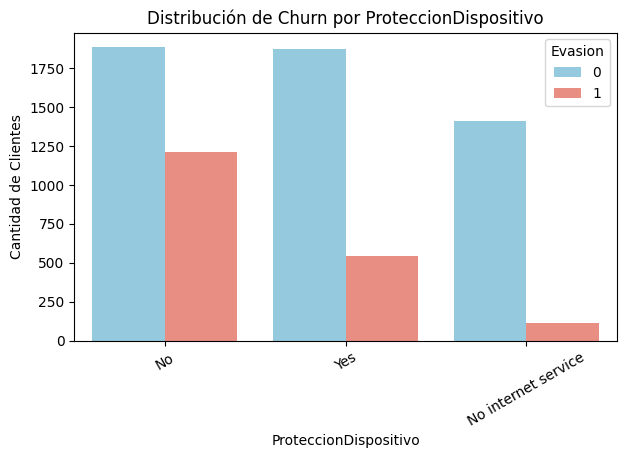

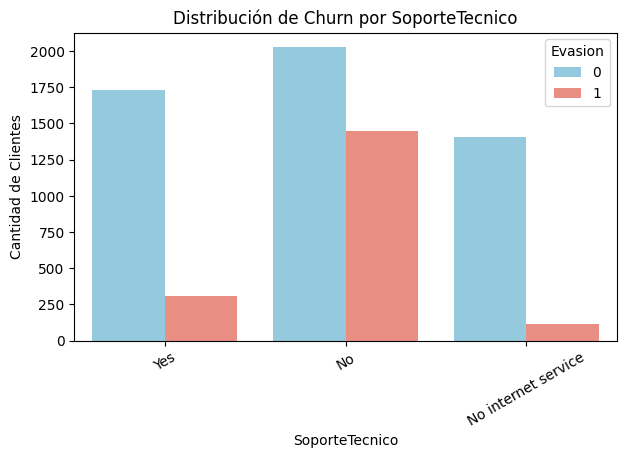

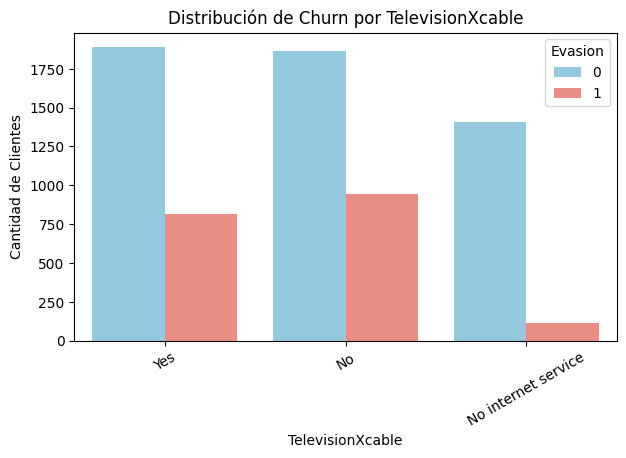

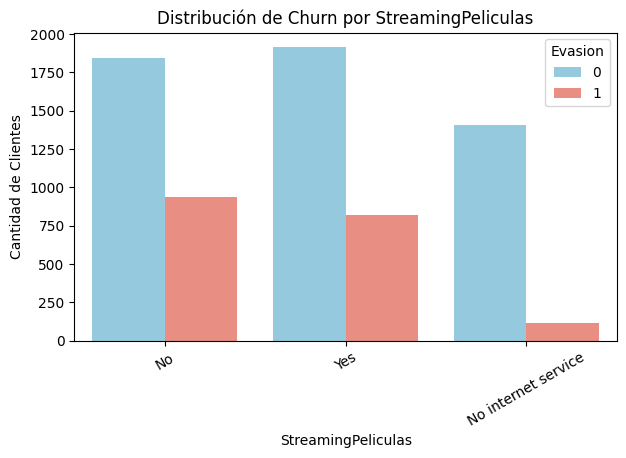

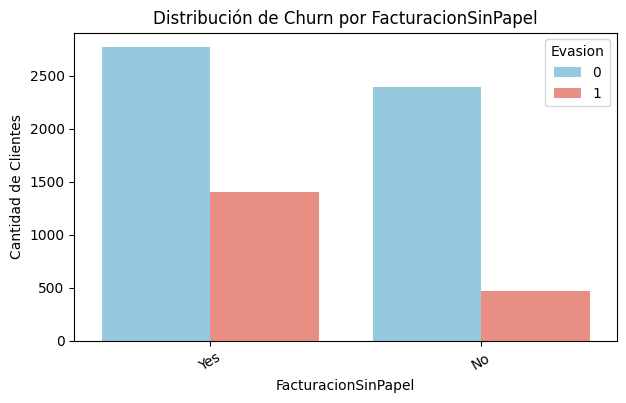

In [253]:

categoricas = [ 'ServicioTelefonico', 'MultiplesLineas', 'ServicioInternet',
               'SeguridadEnLinea', 'RespaldoEnLinea', 'ProteccionDispositivo',
                'SoporteTecnico', 'TelevisionXcable', 'StreamingPeliculas',
                'FacturacionSinPapel']
# Recodemos que 0 es no y 1 s si
# Recorrer y graficar
for col in categoricas:
    plt.figure(figsize=(7,4))
    sns.countplot(data=df, x=col, hue="Evasion", palette=["skyblue","salmon"])
    plt.title(f"Distribución de Churn por {col}")
    plt.xlabel(col)
    plt.ylabel("Cantidad de Clientes")
    plt.xticks(rotation=30)  # rota etiquetas si son largas
    plt.show()

##### Aqui tenemos el analisis e interpretacion de 7 graficas de las establecidas

Basandonos en los graficos en Servicio Internet
- Los clientes con servicio de internet de fibra óptica muestran el mayor número de clientes que evadieron (Evasión = 1), lo que indica que este grupo tiene una mayor tendencia a la evasión en comparación con los demás.

- Los clientes con servicio DSL tienen un número menor de clientes que evadieron que los de fibra óptica.

- Los clientes que no tienen servicio de internet ("No") tienen el número más bajo de clientes que evadieron, lo que sugiere que este grupo es el más estable.

Basandonos en los graficos en Seguridad en Linea


- Clientes con suscripción de seguridad en línea (categoría "Sí"): Estos clientes tienen una tasa de evasión (churn) muy baja. La barra roja que representa a los clientes que evadieron es muy pequeña en comparación con la de los clientes que no evadieron.

- Clientes sin suscripción de seguridad en línea (categoría "No"): Este grupo presenta el mayor número de evasiones. La barra roja para esta categoría es la más alta de todas, lo que indica que una gran cantidad de estos clientes terminaron su servicio.

- Clientes sin servicio de internet (categoría "No internet service"): Este es el grupo con la menor cantidad de evasiones, lo que sugiere que son clientes más estables en general, posiblemente porque no están evaluando otros servicios de internet.

- En resumen, el hecho de tener una suscripción a un servicio de seguridad en línea influye de manera significativa en la evasión del cliente.

Basandonos en los graficos en Respaldo en Linea


- Yes" (Sí tienen respaldo en línea): Hay una gran cantidad de clientes que no evadieron (barra azul, aproximadamente 1800) y una cantidad mucho menor que sí lo hizo (barra roja, aproximadamente 550).

- "No" (No tienen respaldo en línea): Hay una cantidad de clientes que no evadieron similar a la categoría "Yes" (barra azul, también alrededor de 1800). Sin embargo, el número de clientes que sí evadió es considerablemente mayor (barra roja, aproximadamente 1250).

- "No internet service" (No tienen servicio de internet): Como en gráficos anteriores, este grupo tiene una cantidad muy baja de evasiones (barra roja).

Basandonos en los graficos en  Proteccion de dispositivo

Los clientes que no tienen un servicio de protección de dispositivo tienen una tasa de evasión más alta que los que sí lo tienen.

Basandonos en los graficos en Soporte Tecnico  

- Los clientes que sí tienen una suscripción a soporte técnico son mucho menos propensos a evadir. Su tasa de evasión es baja.

- Los clientes que no tienen esta suscripción son los que presentan la mayor cantidad de evasiones.

Basandonos en los graficos en  TV x cable  

Los clientes que no tienen TV por cable tienen una tasa de evasión ligeramente más alta que los que sí tienen este servicio.

Basandonos en los graficos en  StreamingPeliculas

Los clientes que no tienen una suscripción a streaming de películas tienen una tasa de evasión ligeramente más alta que los que sí la tienen.

#### Conteo de evasion por variables numericas

In [254]:
# Seleccionar solo columnas numéricas
numericas = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
print("📊 Variables numéricas:", numericas)


📊 Variables numéricas: ['Adulto_Mayor_de_65', 'Meses_de_Contrato', 'CargosMensuales', 'CargosTotales', 'Cuentas_Diarias']


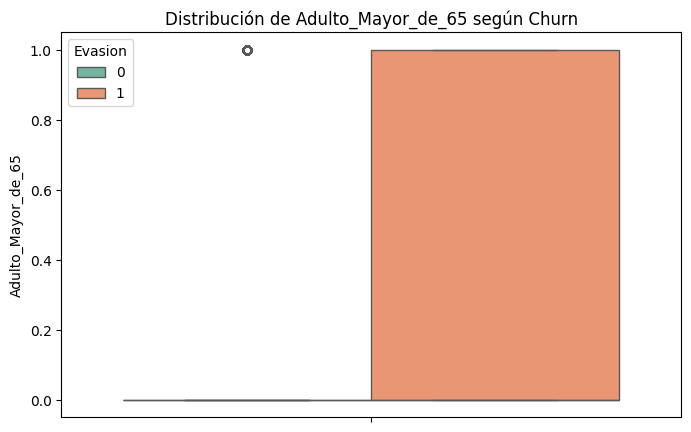

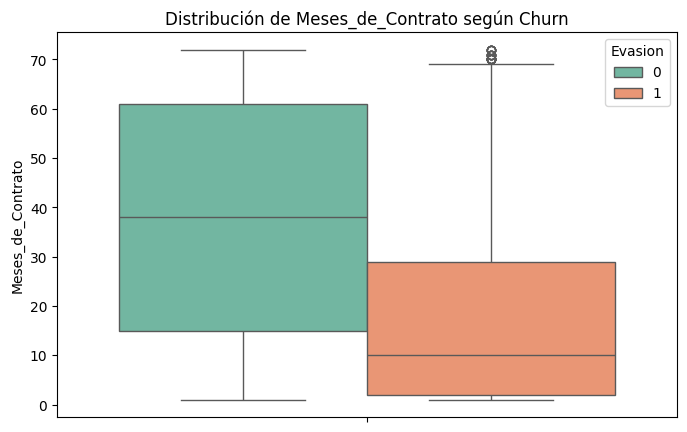

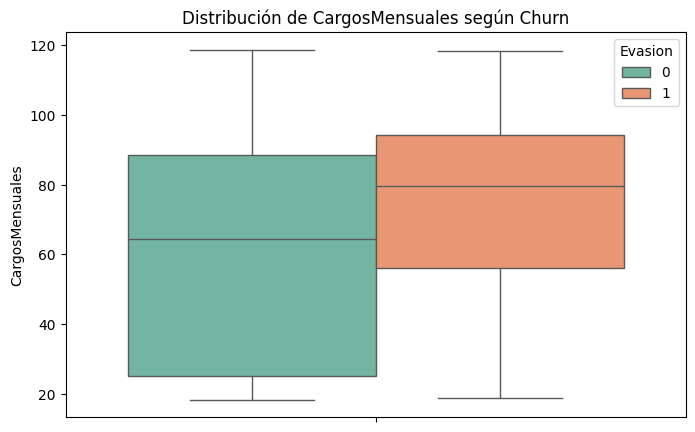

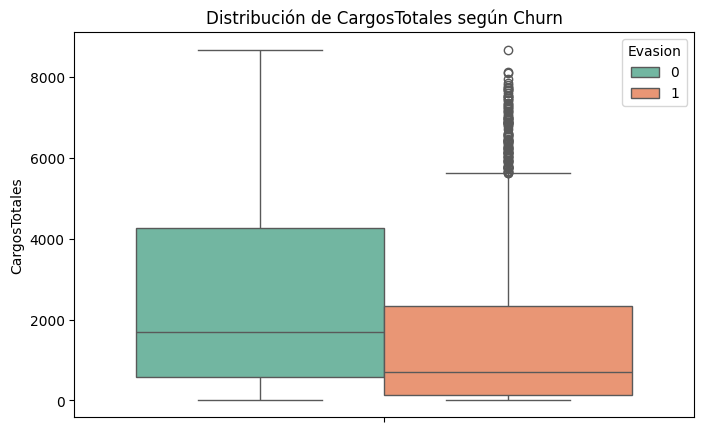

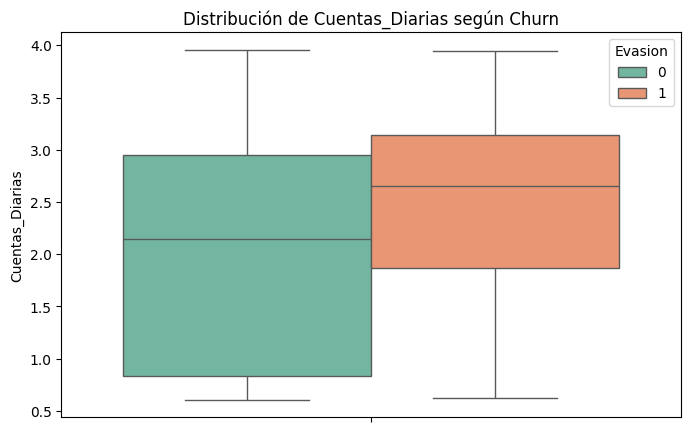

In [255]:
for col in numericas:
    plt.figure(figsize=(8,5))
    sns.boxplot(data=df, hue="Evasion", y=col, palette="Set2")
    plt.title(f"Distribución de {col} según Churn")
    plt.show()


los clientes que evadieron (Evasión = 1) son, en su totalidad (según la representación gráfica), adultos mayores de 65 años. Por el contrario, los clientes que no evadieron (Evasión = 0) son, en su gran mayoría, personas que no son adultos mayores de 65 años.

Esto sugiere que ser un adulto mayor de 65 años es un factor de riesgo muy alto para la evasión en este conjunto de datos. La variable "Adulto_Mayor_de_65" es un influyente clave en el churn.

El número de meses de contrato es una variable que influye de manera muy significativa en la evasión de los clientes.

El análisis del boxplot muestra una clara diferencia: los clientes que han estado con la compañía por un período más corto (mediana de 10 meses) son mucho más propensos a evadir, mientras que los clientes con una mayor antigüedad (mediana de 38 meses) son mucho más propensos a permanecer.

La variable de CargosMensuales sí influye en la evasión de los clientes.

El análisis del boxplot muestra que los clientes con cargos mensuales más altos son los que tienen una mayor tendencia a evadir. La mediana de los clientes que sí evadieron es significativamente más alta que la de los que no lo hicieron. Esto sugiere que el precio del servicio es un factor importante y que los clientes pueden estar más inclinados a irse si perciben que el costo mensual es demasiado elevado.

Sí, existe una diferencia muy clara y significativa en la variable de cargos totales entre los clientes que evaden y los que no.

El análisis del boxplot muestra que los clientes con un mayor monto total acumulado de pagos (cargos totales más altos) son los que tienden a no evadir. Por el contrario, los clientes que evaden son aquellos que, en promedio, han pagado una cantidad total de dinero mucho menor.

# Informe Final

🔹 Introducción:

El objetivo principal de este análisis es identificar las variables y patrones clave que influyen en la evasión de clientes (o "churn") en la empresa telecom X. La evasión de clientes es un problema crítico, ya que la retención de un cliente suele ser más rentable que la adquisición de uno nuevo. Al comprender las razones detrás del abandono, la empresa va a desarrollar estrategias de retención más efectivas y mejorar la satisfacción del cliente.




🔹 Limpieza y Tratamiento de Datos:

Para asegurar la calidad de la información se realizaron los siguientes pasos:

- Importación de la base de datos con información de clientes.

- Normalizar los datos con estructuras anidadas.

- Revisión de valores nulos o faltantes y su tratamiento (eliminación).Asi como la verificacion de valores duplicados en la base de datos.

- Conversión de variables categóricas (ej. tipo de contrato, método de pago, género) a un formato adecuado para el análisis. Asi tambien conversion de la variable cargos totales a float

- Tambien hemos renombrado nuestras columnas de nuestra base de datos para que sea mas entendible al leer.


🔹 Análisis Exploratorio de Datos:

Se realizaron análisis descriptivos y visualizaciones para entender mejor la relación entre las variables y la evasión de clientes:




1. Tiempo del cliente y sus costos (Variables Numericas)

Meses de Contrato: Esta es una de las variables más influyentes. Los clientes que evaden tienen una mediana de solo 10 meses de contrato, mientras que los clientes leales tienen una mediana de 38 meses. Esto demuestra que la evasión es principalmente un problema de clientes nuevos. Los clientes con menor tiempo en la empresa tienen mayor probabilidad de abandonar el servicio.

Cargos Mensuales: Se encontró una diferencia clara. Los clientes con cargos mensuales más altos (mediana de 80) son más propensos a evadir, en comparación con los que no evaden (mediana de 65).

Cargos Totales: Al igual que la antigüedad, los clientes que se van han pagado una cantidad total significativamente menor (mediana de 800) que los que se quedan (mediana de 1700).

2. Servicios Contratados (Variables Categóricas)

Método de Pago: El uso de Electronic Check se relaciona con una mayor evasión, mientras que métodos automáticos como Credit Card o Bank Transfer muestran menor churn.

Servicio de Internet: El tipo de servicio es clave. Los clientes con fibra óptica tienen la mayor tasa de evasión, lo que sugiere una posible insatisfacción con este servicio o una alta competencia en el mercado de fibra.

Servicios Adicionales (Seguridad en Línea, Respaldo, Protección de Dispositivo, Soporte Técnico): Los gráficos muestran un patrón consistente. Los clientes que no tienen estos servicios adicionales son mucho más propensos a evadir que los que sí los tienen. Estos servicios actúan como factores de retención clave.

Facturación sin Papel: Se pudo visualizar que los clientes que optan por la facturación electrónica tienen una mayor tasa de evasión que los que reciben facturas en papel.

3. Características Demográficas y del Contrato

Género: No se observan diferencias significativas entre hombres y mujeres en la tasa de evasión.

Adulto Mayor de 65: Ser un adulto mayor de 65 años es un factor de riesgo muy alto para la evasión. El análisis mostró que una gran proporción de los clientes que evadieron pertenecían a este grupo demográfico.

Tener Pareja y Dependientes: Los clientes que no tienen pareja o no tienen dependientes muestran una mayor propensión a evadir. Los clientes con pareja y dependientes parecen ser más estables.

Tipo de Contrato: Los contratos Month-to-month (mes a mes) presentan la mayor proporción de evasión. En contraste, los contratos de 1 y 2 años muestran menor churn.



🔹 Conclusiones e Insights:

La evasión está más relacionada con el tipo de contrato y el método de pago, que con características demográficas como el género.

Los clientes de contratos mensuales y quienes pagan con Electronic Check presentan un mayor riesgo de churn.

La permanencia corta es un factor crítico: los clientes que llevan menos tiempo tienen mayor probabilidad de irse.

En ese sentido, los clientes con poca antigüedad son los más propensos a evadir, especialmente si su cargo mensual es alto.Lo que provoca vulnerabilidad en clientes nuevos.

Hay que darle Importancia de los Servicios Adicionales como soporte técnico, seguridad en línea y respaldo en linea pues son cruciales para la retención. La falta de estos servicios es un predictor significativo de la evasión.

El segmento de clientes con fibra óptica y, sobre todo, los adultos mayores de 65 años, son grupos de alto riesgo que requieren atención especial.



🔹 Recomendaciones:

- Realizar programas de Retención para Clientes Nuevos
 --- Implementar un programa de "acogida" y seguimiento proactivo durante los primeros 6-12 meses de contrato. Ofrecer incentivos, descuentos o la prueba gratuita de servicios adicionales para aumentar la lealtad desde el principio.

- Promover los Servicios Adicionales
  --- Aumentar los esfuerzos de marketing para promover los servicios de seguridad, respaldo y soporte técnico como "factores de seguridad" o "paquetes de tranquilidad". Ofrecer un precio reducido o un paquete inicial para incentivarlos.

- Diseñar estrategias para Clientes de Fibra Óptica
 --- Investigar las razones de la alta evasión en este segmento. Podría ser un problema de calidad del servicio, de soporte o una oferta de la competencia. Si es un problema de servicio, se deben mejorar las operaciones.

- Atención Especial al Segmento de Adultos Mayores
 --- Desarrollar un plan de comunicación y soporte técnico adaptado a las necesidades de los adultos mayores de 65 años, con instrucciones claras, atención personalizada y canales de soporte accesibles para ellos.

- Incentivar métodos de pago automáticos mediante promociones, ya que estos clientes muestran menor evasión.